In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import skquant.opt as skqopt #optimization routines
from scipy.linalg import expm

In [2]:
# matrix representation of Toffoli gate
U = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])

print(U)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [3]:
arb_state_vector=[]
for i in range(200):
    arb_state_vector.append(np.random.rand(8))

# will help to create 200 random samles to train the variational circuit. Then use 
#  qml.QubitStateVector() see tutorial of The Quantum Graph Recurrent Neural Network


In [4]:
 
'''
provides 98% of accuracy
opt_param=[ 3.69067535e+00 / 4,  2.61189840e+00,  4.74218937e+00,
        -2.13029098e+00, -3.62902728e-12, -4.71130722e-12,
         2.26218686e+00,  1.17809725e+00,  2.10254448e+00,
         2.51583687e+00,  1.82108664e+00,  3.01006937e-12,
         1.00052905e-11,  1.82108664e+00] 
         
         gives fidelity for exact exponentiation=0.985
         
         
         [ 2.75452923e-01, -6.28656710e-25,  3.50147320e-25,
        -3.48054165e-25, -1.39836980e+00, -1.39837055e+00,
        -7.85398163e-01,  1.57079601e+00,  3.14159294e+00,
         3.92699082e-01, -2.03555888e-63,  3.14159265e+00,
         3.14159265e+00, -9.61467473e-26] for N=4/6
         
         gives fidelity for exact exponentiation=0.94
         
         *** parameter for I⊗I⊗I should not be multipled by anything as there is no repetition of that part in 
         the circuit however even after deviding 3.69067535e+00 by 4 the fidelity remains the same i.e. 0.985
'''

'\nprovides 98% of accuracy\nopt_param=[ 3.69067535e+00 / 4,  2.61189840e+00,  4.74218937e+00,\n        -2.13029098e+00, -3.62902728e-12, -4.71130722e-12,\n         2.26218686e+00,  1.17809725e+00,  2.10254448e+00,\n         2.51583687e+00,  1.82108664e+00,  3.01006937e-12,\n         1.00052905e-11,  1.82108664e+00] \n         \n         gives fidelity for exact exponentiation=0.985\n         \n         \n         [ 2.75452923e-01, -6.28656710e-25,  3.50147320e-25,\n        -3.48054165e-25, -1.39836980e+00, -1.39837055e+00,\n        -7.85398163e-01,  1.57079601e+00,  3.14159294e+00,\n         3.92699082e-01, -2.03555888e-63,  3.14159265e+00,\n         3.14159265e+00, -9.61467473e-26] for N=4/6\n         \n         gives fidelity for exact exponentiation=0.94\n         \n         *** parameter for I⊗I⊗I should not be multipled by anything as there is no repetition of that part in \n         the circuit however even after deviding 3.69067535e+00 by 4 the fidelity remains the same i.e. 0.

In [78]:
params_arr[len(params_arr)-1]*2.5 #        I⊗I⊗I + I⊗I⊗Z + Z⊗I⊗Z + I⊗Z⊗Z+ X⊗X⊗I + Y⊗Y⊗I + 
             #     Z⊗Z⊗I + Z⊗I⊗I +  I⊗Z⊗I +  I⊗I⊗X  +  I⊗X⊗I  +  X⊗I⊗I  +  X⊗I⊗X  +I⊗X⊗X

tensor([ 2.75482014e-01,  2.94195150e-07, -3.70824148e-06,
         1.91896636e-05,  1.58384570e+00,  1.53957385e+00,
         8.04408655e-01,  4.99099793e-01,  1.03541765e+00,
         3.92807044e-01,  2.03822938e+00,  1.01657323e+00,
         1.01657323e+00,  2.03822937e+00], requires_grad=True)

In [5]:
dev = qml.device("default.qubit", wires=3)


#@qml.qnode(dev)
def ansatz(params):
    l=params
    
    #H=I⊗I⊗Z
    qml.RZ(l[0],wires=2)
    
    #H=Z⊗I⊗Z
    qml.CNOT(wires=[0,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[0,2])
    
    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[2],wires=2)
    qml.CNOT(wires=[1,2])
    
    # circuit for local ham H=X⊗X⊗I  
    [qml.Hadamard(wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[3],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.Hadamard(wires=i) for i in range(0,2)]
    
     # circuit for local ham H=Y⊗Y⊗I
    [qml.RX(np.pi/2,wires=i) for i in range(0,2)]
    qml.CNOT(wires=[0,1])
    qml.RZ(l[4],wires=1)
    qml.CNOT(wires=[0,1])
    [qml.RX(-np.pi/2,wires=i) for i in range(0,2)]

    
    #H=Z⊗Z⊗I
    qml.CNOT(wires=[0,1])
    qml.RZ(l[5],wires=1)
    qml.CNOT(wires=[0,1])

    #Z⊗I⊗I
    qml.RZ(l[6],wires=0)
   
    #I⊗Z⊗I
    qml.RZ(l[7],wires=1)
    
    #I⊗I⊗X
    qml.RX(l[8],wires=2)
    
    #I⊗X⊗I
    qml.RX(l[9],wires=1)
    
    #X⊗I⊗I
    qml.RX(l[10],wires=0)
    
    # circuit for local ham H=X⊗I⊗X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[11],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=I⊗X⊗X
    [qml.Hadamard(wires=i) for i in range(1,3)]
    qml.CNOT(wires=[1,2])
    qml.RZ(l[12],wires=2)
    qml.CNOT(wires=[1,2])
    [qml.Hadamard(wires=i) for i in range(1,3)]
    
    '''
    # single qubit gates
    
    # circuit for local ham H=I⊗I⊗Z+I⊗I⊗X+I⊗I⊗Y
    
    #I⊗I⊗X
    qml.Hadamard(wires=2)
    qml.RZ(l[2],wires=2)
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=I⊗Z⊗I+I⊗X⊗I+I⊗Y⊗I
    #qml.Identity(wires=0) 
    
    
   
    # circuit for local ham H=Z⊗I⊗I+X⊗I⊗I+Y⊗I⊗I
    
    
  
    #H=I⊗Z⊗ X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[1,2])
    qml.RZ(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    qml.Hadamard(wires=2)
    
    
    # circuit for local ham H=Z⊗I⊗X
    qml.Hadamard(wires=2)
    qml.CNOT(wires=[0,2])
    qml.RZ(l[6],wires=2)
    qml.CNOT(wires=[0,2])
    qml.Hadamard(wires=2)
    
    # circuit for local ham H=Z⊗I⊗Z
    qml.CNOT(wires=[0,2])
    qml.RZ(l[7],wires=2)
    qml.CNOT(wires=[0,2])
    '''

In [6]:
params_known=[3*np.pi/8,np.pi/2,np.pi/8*np.sqrt(143/5),np.pi/8*np.sqrt(143/5),np.pi/8*5*np.sqrt(3),np.pi/8*5*np.sqrt(3),
              -3*np.pi/8,-3*np.pi/8,-3*np.pi/8,3*np.pi/4*np.sqrt(7/5),3*np.pi/4*np.sqrt(7/5)]
print(params_known)

[1.1780972450961724, 1.5707963267948966, 2.100114155644118, 2.100114155644118, 3.400873807939158, 3.400873807939158, -1.1780972450961724, -1.1780972450961724, -1.1780972450961724, 2.7878869176955274, 2.7878869176955274]


In [8]:
@qml.qnode(dev)
def circuit(params, state, apply_inv=True):
    qml.BasisState(np.array(state), wires=[0,1,2])
  
    ansatz(params[:13])
    ansatz(params[:13])
    
    ansatz(params[:13])
    
    ansatz(params[:13])
    
    ansatz(params[:13])
    ansatz(params[:13])

    return qml.state()

def var_circ(params,state):
    result=(np.exp(-1j*params[0])*circuit(params[1:],state))
    
    return result

In [16]:
#print(circuit(a,state_vector[0]))
#QNN.draw()
specs_func = qml.specs(circuit)
specs_func(a,state_vector[0])

{'gate_sizes': defaultdict(int, {3: 1, 1: 174, 2: 84}),
 'gate_types': defaultdict(int,
             {'BasisState': 1,
              'RZ': 60,
              'CNOT': 84,
              'Hadamard': 72,
              'RX': 42}),
 'num_operations': 259,
 'num_observables': 1,
 'num_diagonalizing_gates': 0,
 'num_used_wires': 3,
 'depth': 193,
 'num_device_wires': 3,
 'device_name': 'default.qubit.autograd',
 'diff_method': 'backprop'}

In [9]:
@qml.qnode(dev, diff_method="backprop")
def target_st(state):
    qml.BasisState(np.array(state), wires=[0,1,2])
    qml.QubitUnitary(U,wires=[0,1,2]).inv() # fredkin gate
    return qml.state()

In [10]:
def get_unitary(params):
    return np.array([var_circ(params, state) for state in state_vector]).T

In [11]:
# 1st cost => the overlaps between target and variational kets are taken as cost
def cost3(params):
    circ_ket=[]
    act_ket=[]
    overlaps=[] 
        
    for i in range(8):
        state=state_vector[i]
        circ_ket.append(var_circ(params,state))
        act_ket.append(target_st(state))

        overlaps.append((np.sum(np.dot(np.conj(circ_ket[i]),act_ket[i]))))
    cost=0
    for i in range(8):
        cost+=(overlaps[i])
    cost_abs=1-np.abs(cost)/len(overlaps)   
    return cost_abs#, overlaps

In [12]:
# 2nd cost the trace distance between two unitaries is taken as cost
def cost1(params):
    U_par=get_unitary(params)
    F=np.abs(np.trace(np.dot(np.transpose(np.conj(U_par)),U)))/len(U)
    
    return 1-F

In [13]:
params = np.random.random(14)
Id = np.eye(8, requires_grad=False)
state_vector=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
print(Id[7])
print(state_vector[7])

[0. 0. 0. 0. 0. 0. 0. 1.]
[1 1 1]


In [14]:
a=np.array([ 3.69067535e+00 ,  2.61189840e+00,  4.74218937e+00,
        -2.13029098e+00, -3.62902728e-12, -4.71130722e-12,
         2.26218686e+00,  1.17809725e+00,  2.10254448e+00,
         2.51583687e+00,  1.82108664e+00,  3.01006937e-12,
         1.00052905e-11,  1.82108664e+00]
         
         )
a/4

tensor([ 9.22668837e-01,  6.52974600e-01,  1.18554734e+00,
        -5.32572745e-01, -9.07256820e-13, -1.17782681e-12,
         5.65546715e-01,  2.94524312e-01,  5.25636120e-01,
         6.28959217e-01,  4.55271660e-01,  7.52517343e-13,
         2.50132262e-12,  4.55271660e-01], requires_grad=True)

In [17]:
cost1(params)

0.7025946568897881

In [18]:
cost_arr=[]
params_arr=[]
cost_arr_opt=[]
params_arr_opt=[]

In [38]:

def optimization2(params,st):
    dev = qml.device("default.qubit.autograd", wires=3)

    opt = qml.AdagradOptimizer(stepsize=st)
    
    
    for i in range(100+1):
        params = opt.step(cost1, params)

        if i % 10 == 0:
            print(f"Cost at step {i}:", cost1(params))
            cost_arr.append(cost1(params))
            params_arr.append(params)
            
            
    if cost1(params)>0.008:
        params=np.random.random(14)
    if Fidelity(hamiltonian_matrix(params*3),U)<0.99:
        st=np.random.uniform(0.01,0.2)
        optimization2(params,st)
        
    else:
        
        
        for i in range(0,10+1,1):
            print(f"Cost at step {i*10}:", cost1(params_arr[len(cost_arr)-11+i]))
            cost_arr_opt.append(cost1(params_arr[len(cost_arr)-11+i]))
            params_arr_opt.append(params_arr[len(cost_arr)-11+i])
            
    return params_arr_opt,st
        

In [39]:
#params=par[10]
optimization2(params,0.1) # st=learning rate==stepsize

Cost at step 0: 0.4829432271773112
Cost at step 10: 0.2259500193641516
Cost at step 20: 0.21260534740359316
Cost at step 30: 0.20751019723661024
Cost at step 40: 0.2055018473068907
Cost at step 50: 0.20473279011817502
Cost at step 60: 0.2044267624492484
Cost at step 70: 0.20429748431750394
Cost at step 80: 0.20424000155293387
Cost at step 90: 0.20421347096801
Cost at step 100: 0.2042008979649227
Cost at step 0: 0.4716038521384047
Cost at step 10: 0.17773411267397732
Cost at step 20: 0.08854809406722308
Cost at step 30: 0.03541445580789149
Cost at step 40: 0.03295908885644583
Cost at step 50: 0.031590923065606735
Cost at step 60: 0.020638003972531904
Cost at step 70: 0.0062167886634116876
Cost at step 80: 0.005492372098110154
Cost at step 90: 0.005483209925593147
Cost at step 100: 0.0054830985277321
Cost at step 0: 0.4716038521384047
Cost at step 10: 0.17773411267397732
Cost at step 20: 0.08854809406722308
Cost at step 30: 0.03541445580789149
Cost at step 40: 0.03295908885644583
Cost at

([tensor([0.64053303, 0.35147181, 0.45908855, 0.90413195, 0.37906476,
          0.69653139, 0.30994132, 0.4640905 , 0.47233158, 0.51799653,
          0.81364258, 0.52401455, 0.70582455, 0.62890893], requires_grad=True),
  tensor([0.64053303, 0.72413058, 0.41548723, 0.530005  , 0.31393798,
          0.45557519, 0.38447899, 0.51761274, 0.38198591, 0.63913798,
          0.78671786, 0.60269671, 0.70247427, 0.62400175], requires_grad=True),
  tensor([0.64053303, 0.83316368, 0.39109925, 0.41470537, 0.32659787,
          0.43255522, 0.41896053, 0.51739655, 0.50766072, 0.56432167,
          0.69199995, 0.66210944, 0.6592231 , 0.64952507], requires_grad=True),
  tensor([0.64053303, 0.86499454, 0.39218298, 0.39446102, 0.32925328,
          0.42069586, 0.42840555, 0.53563647, 0.53423096, 0.52963681,
          0.66494333, 0.66213595, 0.65006666, 0.64901435], requires_grad=True),
  tensor([0.64053303, 0.8766193 , 0.39622271, 0.39514542, 0.32996845,
          0.41413742, 0.43413271, 0.54660289, 0.54

In [103]:
'''
The above optimizer is for the best initial guess of the parameters and later this set of parameters will be used 
in imfil optimizer for the final optimizer
'''

'\nThe above optimizer is for the best initial guess of the parameters and later this set of parameters will be used \nin imfil optimizer for the final optimizer\n'

In [40]:
print("cost:-",cost1(params_arr[len(params_arr)-1]))
#params_arr[len(params_arr)-18]
print("optimal parameters",params_arr[len(params_arr)-1]*3)

cost:- 0.0054830985277321
optimal parameters [2.24436607e+00 1.92641050e-09 2.41232706e-07 9.75061475e-08
 1.58517917e+00 1.53260177e+00 8.00032960e-01 4.85627812e-01
 1.05829268e+00 3.53434416e+00 2.02733839e+00 1.01581629e+00
 1.01581154e+00 2.02735145e+00]


In [196]:
'''
Trying with imfil optimizer
'''

'\nTrying with imfil optimizer\n'

In [46]:
bounds = [[-2*np.pi,2*np.pi]]
for i in range(13):
    bounds.append([-10,10])
    
len(bounds)

14

In [47]:
budget = 60000

In [48]:
x0=params_arr[len(params_arr)-1]
 #Optimize using Imfil
result, history = skqopt.minimize(cost1, x0, bounds, budget, method='imfil')

In [49]:
opt_param=result.optpar

In [50]:
print(cost1(opt_param))
(opt_param*3)

0.005483098527731434


array([-1.11828423e-01,  1.92641103e-09,  2.41232708e-07,  9.75061525e-08,
        1.58517917e+00,  1.53260177e+00,  8.00032960e-01,  4.85627812e-01,
        1.05829268e+00,  3.53434416e+00,  2.02733839e+00,  1.01581629e+00,
        1.01581154e+00,  2.02735145e+00])

In [ ]:
'''
if wish to peform optimization in future the take the above array and divide it by 2.5 and set it as x0=array/2.5
and we will have same set of data which we used to plot the below graphs
'''

In [41]:
# this set of parameters provides fidelity=0.989

In [202]:
len(history)

208

In [41]:
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
Y = np.array([[0,-1j],[1j, 0]])
dev = qml.device('default.qubit', wires=3)

# Hamiltonian for Toffoli
def hamiltonian_matrix(params):
    l=params
    H=l[0]*np.kron(np.kron(I,I),I) + l[1]*np.kron(np.kron(I,I),Z) + l[2]*np.kron(np.kron(Z,I),Z) + \
        l[3]*np.kron(np.kron(I,Z),Z) + l[4]*np.kron(np.kron(X,X),I) +\
        l[5]*np.kron(np.kron(Y,Y),I) + l[6]*np.kron(np.kron(Z,Z),I) + l[7]*np.kron(np.kron(Z,I),I) + \
        l[8]*np.kron(np.kron(I,Z),I) + l[9]*np.kron(np.kron(I,I),X) + \
        l[10]*np.kron(np.kron(I,X),I) + l[11]*np.kron(np.kron(X,I),I) + l[12]*np.kron(np.kron(X,I),X) + \
       l[13]*np.kron(np.kron(I,X),X)
    
    return expm(-1j*H)


In [42]:
# Function to find the fidelity between two unitaries
def Fidelity(rho1,rho2):
    if rho1.shape!=rho2.shape:
        raise ValueError("Dimension of both matrices must be same")
    return (np.abs(np.trace(np.dot(np.transpose(np.conj(rho1)),rho2)))/len(rho1))

In [43]:
(params_arr[len(params_arr)-1])*3

tensor([2.24436607e+00, 1.92641050e-09, 2.41232706e-07, 9.75061475e-08,
        1.58517917e+00, 1.53260177e+00, 8.00032960e-01, 4.85627812e-01,
        1.05829268e+00, 3.53434416e+00, 2.02733839e+00, 1.01581629e+00,
        1.01581154e+00, 2.02735145e+00], requires_grad=True)

In [51]:
rho1=hamiltonian_matrix([-1.11828423e-01,  1.92641103e-09,  2.41232708e-07,  9.75061525e-08,
        1.58517917e+00,  1.53260177e+00,  8.00032960e-01,  4.85627812e-01,
        1.05829268e+00,  3.53434416e+00,  2.02733839e+00,  1.01581629e+00,
        1.01581154e+00,  2.02735145e+00])

'''
hamiltonian_matrix([ 14.70680597,  2.93760421,  1.50054604,  1.6154871 ,  3.10889122,
        3.09924546,  9.02167293,  1.88011837,  2.1182022 ,  1.50551024,
       -0.13108176, -0.16354886, -0.1107321 , -0.2536832]) gives fidelity 0.989< 0.998
        
'''
'''      
    hamiltonian_matrix([ 2.24436607e+00, 1.92641050e-09, 2.41232706e-07, 9.75061475e-08,
        1.58517917e+00, 1.53260177e+00, 8.00032960e-01, 4.85627812e-01,
        1.05829268e+00, 3.53434416e+00, 2.02733839e+00, 1.01581629e+00,
        1.01581154e+00, 2.02735145e+00]) #=result=optimized parameters Gives fidelity=0.9986485
'''
rho2=U
print("Fidelity between the actual Fredkin and the optimized Fredkin",Fidelity(rho2,(rho1)))
#print((rho1))

Fidelity between the actual Fredkin and the optimized Fredkin 0.9986485941707757


In [53]:
F=[]
for i in range(len(history)):
    F.append(Fidelity(hamiltonian_matrix(history[i][1:]*3),U))
    
F.append(Fidelity(hamiltonian_matrix(opt_param*3),U))
F # used in the below plot , F=Fidelity

[0.9986485940031673,
 0.9986485940031671,
 0.03472994573853889,
 0.20273775215082082,
 0.20273723284595008,
 0.11427034181819495,
 0.26814333886574815,
 0.3121924042645203,
 0.10540395867946158,
 0.19485167966180647,
 0.1539739790478492,
 0.31058392586943845,
 0.09981967028451985,
 0.09982299348129892,
 0.31058399758307853,
 0.9986485940031679,
 0.16228161843984112,
 0.2238947930294664,
 0.22389459246566315,
 0.5689811656700113,
 0.3083823396815954,
 0.5506855234561917,
 0.24550556174757904,
 0.2626101381536652,
 0.7587074990107792,
 0.17878846478842078,
 0.5139876946018007,
 0.513989565094814,
 0.17878896097261573,
 0.9986485940031675,
 0.1622815845530239,
 0.2238948487501425,
 0.2238946369976323,
 0.568375883951891,
 0.6585633008096125,
 0.5595307041901221,
 0.1452351051692949,
 0.19832857277821908,
 0.7586152240066891,
 0.42276996978711556,
 0.3258666654502228,
 0.325864734279731,
 0.4227693525259195,
 0.9986485940031679,
 0.010888717587251174,
 0.14830963902553573,
 0.1483085165309

In [54]:
for i in range(209):
    if F[i]>0.98922:
        print(i,"->",F[i])

0 -> 0.9986485940031673
1 -> 0.9986485940031671
15 -> 0.9986485940031679
29 -> 0.9986485940031675
43 -> 0.9986485940031679
57 -> 0.9986485940031679
71 -> 0.9986485940031674
85 -> 0.998648594003167
103 -> 0.9986485940031674
117 -> 0.998648594003167
131 -> 0.9986485940031676
145 -> 0.9986485940031672
159 -> 0.9986485940031677
173 -> 0.9986485940031676
187 -> 0.9986485940031676
201 -> 0.9986485940031675


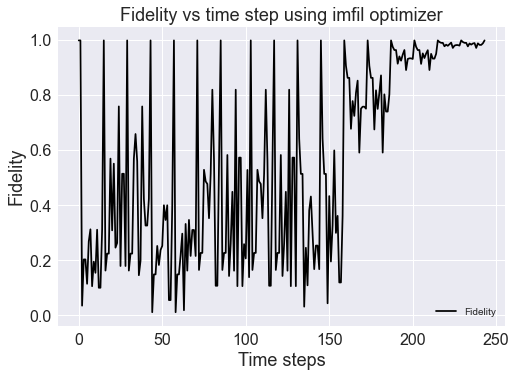

In [55]:
plt.style.use("seaborn")
x=np.linspace(0,243,244)
plt.plot(x,F,"black",label="Fidelity")
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Fidelity vs time step using imfil optimizer", fontsize=18)
plt.legend()
plt.show()

In [209]:
cost1(history[207][1:])   ## The first element in "history" contain the value of cost at that step and the rest of the elements
                 ## of history[i] execpt 1st contain the parameters which gives that cost value at that step

0.4415115426776273

In [56]:
parameters=[]
for i in range(208):
    parameters.append(history[i][1:])
parameters.append(opt_param)
Fidelity(hamiltonian_matrix(parameters[208]*2.5),U)
parameters  # used in the below plot 

[array([7.48122022e-01, 6.42137010e-10, 8.04109028e-08, 3.25020508e-08,
        5.28393055e-01, 5.10867257e-01, 2.66677653e-01, 1.61875937e-01,
        3.52764226e-01, 1.17811472e+00, 6.75779465e-01, 3.38605429e-01,
        3.38603847e-01, 6.75783818e-01]),
 array([-5.53506328e+00,  6.42137010e-10,  8.04109028e-08,  3.25020508e-08,
         5.28393055e-01,  5.10867257e-01,  2.66677653e-01,  1.61875937e-01,
         3.52764226e-01,  1.17811472e+00,  6.75779465e-01,  3.38605429e-01,
         3.38603847e-01,  6.75783818e-01]),
 array([ 7.48122022e-01, -1.00000000e+01,  8.04109028e-08,  3.25020508e-08,
         5.28393055e-01,  5.10867257e-01,  2.66677653e-01,  1.61875937e-01,
         3.52764226e-01,  1.17811472e+00,  6.75779465e-01,  3.38605429e-01,
         3.38603847e-01,  6.75783818e-01]),
 array([ 7.48122022e-01,  6.42137010e-10, -9.99999992e+00,  3.25020508e-08,
         5.28393055e-01,  5.10867257e-01,  2.66677653e-01,  1.61875937e-01,
         3.52764226e-01,  1.17811472e+00,  6.7

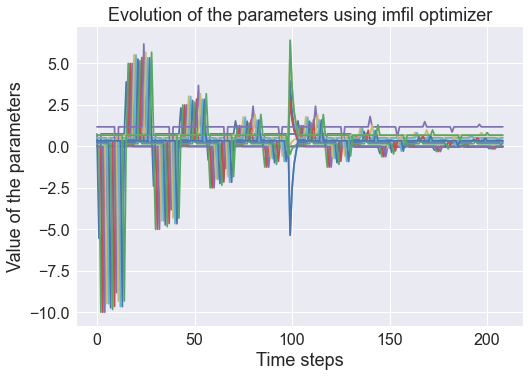

In [57]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
p7=[]
p8=[]
p9=[]
p10=[]
p11=[]
p12=[]
p13=[]
p14=[]
for i in range(209):
    p1.append(parameters[i][0])
    p2.append(parameters[i][1])
    p3.append(parameters[i][2])
    p4.append(parameters[i][3])
    p5.append(parameters[i][4])
    p6.append(parameters[i][5])
    p7.append(parameters[i][6])
    p8.append(parameters[i][7])
    p9.append(parameters[i][8])
    p10.append(parameters[i][9])
    p11.append(parameters[i][10])
    p12.append(parameters[i][11])
    p13.append(parameters[i][12])
    p14.append(parameters[i][13])
    
x=np.linspace(0,208,209) # len(parameters)=209
plt.plot(x,p1)
plt.plot(x,p2)
plt.plot(x,p3)
plt.plot(x,p4)
plt.plot(x,p5)
plt.plot(x,p6)
plt.plot(x,p7)
plt.plot(x,p8)
plt.plot(x,p9)
plt.plot(x,p10)
plt.plot(x,p11)
plt.plot(x,p12)
plt.plot(x,p13)
plt.plot(x,p14)
plt.ylabel("Value of the parameters", fontsize=18)
plt.xlabel("Time steps", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Evolution of the parameters using imfil optimizer", fontsize=18)
plt.legend()
plt.show()

In [82]:
def get_unitary(params):
    return np.array([var_circ(params, state) for state in state_vector]).T

In [76]:
print("\nOptimized unitary using Hamiltonian:\n", (get_unitary(params_arr[len(params_arr)-1])))
print("\nThe corresponding optimized parameters:\n",params_arr[len(params_arr)-1])
print("\nOptimized unitary size:\n", get_unitary(params_arr[len(params_arr)-1]).shape)
print("\nActual Fredkin:\n", U)


Optimized unitary using Hamiltonian:
 [[-0.48061896-8.72564024e-01j -0.01361545+1.12065285e-02j
   0.04061771-2.14689817e-02j  0.04061839-2.14715345e-02j
  -0.01351656+2.50109278e-02j -0.01352544+2.50119684e-02j
  -0.01429454-3.26427320e-02j  0.0072857 -1.28503172e-02j]
 [-0.01361552+1.12065669e-02j -0.48060671-8.72570634e-01j
   0.04061948-2.14680576e-02j  0.04062015-2.14706110e-02j
  -0.01352043+2.50114847e-02j -0.0135293 +2.50125247e-02j
   0.00727838-1.28545516e-02j -0.01430043-3.26366043e-02j]
 [ 0.03142919-3.05319515e-02j  0.03142933-3.05339651e-02j
  -0.53717647-8.32388779e-01j -0.0749573 +5.41250863e-02j
  -0.01256037-2.31629747e-02j  0.00718819-3.09714655e-02j
   0.04144062+2.28284243e-02j  0.04144193+2.28261407e-02j]
 [ 0.03143107-3.05312265e-02j  0.03143122-3.05332404e-02j
  -0.07495794+5.41229987e-02j -0.53718891-8.32380048e-01j
   0.0071808 -3.09691971e-02j -0.01255775-2.31656156e-02j
   0.04145005+2.28260725e-02j  0.04145136+2.28237880e-02j]
 [-0.02681079-4.05769880e-03j

In [77]:
print("The non zero elements of the optimized Fredkin gate")
for i in range(6):
    print(get_unitary(params_arr[len(params_arr)-1])[i][i])
    
#print(get_unitary(par[10])[5][6])
print(get_unitary(params_arr[len(params_arr)-1])[6][7])
print(get_unitary(params_arr[len(params_arr)-1])[7][6])

The non zero elements of the optimized Fredkin gate
(-0.4806189620155089-0.8725640244117956j)
(-0.480606706162125-0.8725706343135956j)
(-0.5371764724788928-0.8323887792357935j)
(-0.5371889064405093-0.8323800475508585j)
(-0.4171224144806527-0.902979212710435j)
(-0.41711085588145574-0.9029838196817156j)
(-0.4778554006329988-0.8703734762221038j)
(-0.47785025062979397-0.8703764285038011j)


In [212]:
'''
When you want to plot the parameter evolution graph but don't to execute the code again then kindly copy each array 
of parameters at each cost value and then put it inside np.array([[1st array of parameters at cost __],
       [2nd array of parameters at cost __],[....],....]) build the whole array of parameter set at every cost and then assign 
    it to the "arr2=np.array([[...],[...],...])""
'''

'\nWhen you want to plot the parameter evolution graph but don\'t to execute the code again then kindly copy each array \nof parameters at each cost value and then put it inside np.array([[1st array of parameters at cost __],\n       [2nd array of parameters at cost __],[....],....]) build the whole array of parameter set at every cost and then assign \n    it to the "arr2=np.array([[...],[...],...])""\n'

In [65]:
costarr=cost_arr_opt[len(cost_arr_opt)-11:]
cost_arr_opt[len(cost_arr_opt)-11:] # the array that is used to plot the below two graphs

[0.4716038521384047,
 0.17773411267397732,
 0.08854809406722308,
 0.03541445580789149,
 0.03295908885644583,
 0.031590923065606735,
 0.020638003972531904,
 0.0062167886634116876,
 0.005492372098110154,
 0.005483209925593147,
 0.0054830985277321]

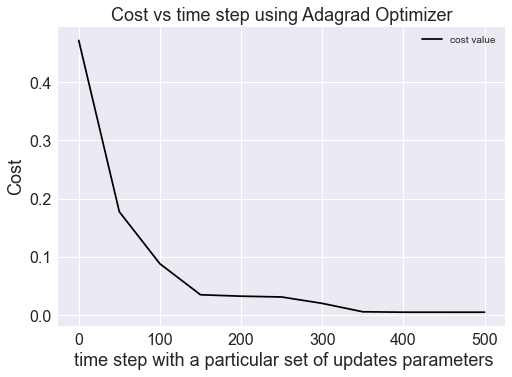

In [66]:
x=np.linspace(0,500,11)
y=costarr
plt.style.use("seaborn")
plt.plot(x,y,"black",label="cost value")
plt.title("Cost vs time step using Adagrad Optimizer", fontsize=18)
plt.ylabel("Cost", fontsize=18)
plt.xlabel(" time step with a particular set of updates parameters", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.legend()
plt.show()

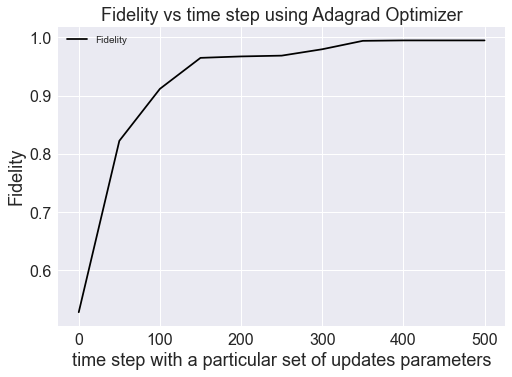

In [67]:
fidelity=[]
for elements in costarr:
    fidelity.append(1-elements)
    
fidelity
x=np.linspace(0,500,11)
y=fidelity
plt.plot(x,y,"black",label="Fidelity")
plt.title("Fidelity vs time step using Adagrad Optimizer", fontsize=18)
plt.ylabel("Fidelity", fontsize=18)
plt.xlabel("time step with a particular set of updates parameters", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.legend()
plt.show()

In [68]:
paramsarr=params_arr_opt[len(params_arr_opt)-11:]
params_arr_opt[len(params_arr_opt)-11:]  # array that is used to plot the below  graph of parameter evolution

[tensor([0.74812202, 0.25248916, 0.65346796, 0.51531439, 0.82397772,
         0.21777276, 0.45326741, 0.21831658, 0.55495401, 0.88171264,
         0.56413102, 0.35271546, 0.29192863, 0.28398623], requires_grad=True),
 tensor([0.74812202, 0.37793572, 0.36251839, 0.30561291, 0.64061709,
         0.43486612, 0.35829574, 0.37482591, 0.45785224, 1.00797657,
         0.43520153, 0.39930707, 0.45595257, 0.46942738], requires_grad=True),
 tensor([0.74812202, 0.15705639, 0.20886019, 0.16976775, 0.55858149,
         0.55134503, 0.33556243, 0.30784705, 0.32104432, 1.13705585,
         0.48513771, 0.48383334, 0.49107711, 0.49650053], requires_grad=True),
 tensor([0.74812202, 0.01596274, 0.0544169 , 0.03530025, 0.5180253 ,
         0.60342388, 0.31886916, 0.26206222, 0.26372083, 1.17686765,
         0.50421861, 0.50055789, 0.50036605, 0.50119451], requires_grad=True),
 tensor([0.74812202, 0.0026397 , 0.01108421, 0.00706382, 0.51618815,
         0.6059431 , 0.31824792, 0.25731707, 0.26150059, 1.1784

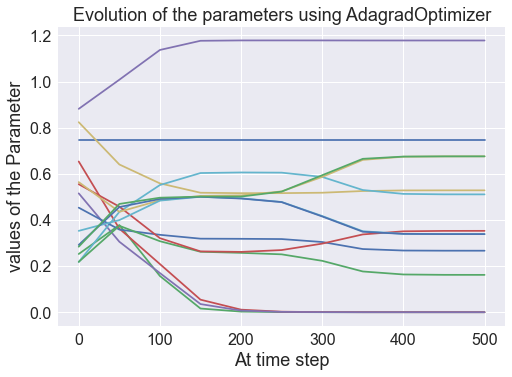

In [69]:
x=np.linspace(0,500,11)
y=paramsarr
plt.plot(x,y)
plt.ylabel("values of the Parameter", fontsize=18)
plt.xlabel("At time step", fontsize=18)
plt.title("Evolution of the parameters using AdagradOptimizer", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.legend()
plt.show()

In [85]:
circuit.draw()

' 0: ──╭|1⟩────────────────╭C─────────────────╭C───H───────────────────────────────╭C─────────────╭C──H──RX(1.57)──╭C─────────────╭C──RX(-1.57)──╭C─────────────╭C──RZ(0.2)────RX(0.407)──H──╭C─────────────╭C──H─────────────────────────────────────────╭C─────────────────╭C───H───────────────────────────────╭C─────────────╭C──H──RX(1.57)──╭C─────────────╭C──RX(-1.57)──╭C─────────────╭C──RZ(0.2)────RX(0.407)──H──╭C─────────────╭C──H─────────────────────────────────────────╭C─────────────────╭C───H───────────────────────────────╭C─────────────╭C──H──RX(1.57)──╭C─────────────╭C──RX(-1.57)──╭C─────────────╭C──RZ(0.2)────RX(0.407)──H──╭C─────────────╭C──H─────────────────────────────────────────╭C─────────────────╭C───H───────────────────────────────╭C─────────────╭C──H──RX(1.57)──╭C─────────────╭C──RX(-1.57)──╭C─────────────╭C──RZ(0.2)────RX(0.407)──H──╭C─────────────╭C──H─────────────────────────────────────────╭C─────────────────╭C───H───────────────────────────────╭C─────────────╭C──H──RX(

In [252]:
np.random.uniform(0.2,0.6)

0.4674665779703778